# Down syndrome specific traits

Marc Subirana-Granés (2024)

Description

# Load libraries/modules

In [40]:
library(dplyr)
library(here)
library(pheatmap)

# Load data

In [49]:
# Define the output directory path
output_nb_path <- here(file.path("output", "nbs", "ds_specific_traits"))

# Create the directory if it doesn't exist
if (!dir.exists(output_nb_path)) {
  dir.create(output_nb_path, recursive = TRUE)
}

In [50]:
phenomexcan <- readRDS('~/Downloads/gls-summary-phenomexcan.rds')
phenomeXcan_DS_traits <- read.csv(here::here('data/phenomeXcan_DS_traits.csv'))

In [51]:
sub_phenomeXcan_DS_traits <- phenomeXcan_DS_traits %>% 
dplyr::filter(n_cases > 1000)

# Filter DS specific traits

In [52]:
ds_phenomexcan <-  phenomexcan %>% 
                   dplyr::filter(phenotype %in% sub_phenomeXcan_DS_traits$short_code) %>% 
                    dplyr::filter(fdr < 0.05)

head(ds_phenomexcan)

,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
11844,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV52,3.866972e-09,2.194222e-05
11845,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV19,4.998219e-06,9.257750e-03
11846,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV257,6.264476e-06,1.107963e-02
11847,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV147,4.864166e-05,4.958498e-02
20727,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV83,4.067246e-09,2.280720e-05
20728,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV769,5.677181e-08,2.320184e-04


In [53]:
# load significant LVs
projection_GSE190125_sig <- readRDS(here(file.path('output/nbs/project_T21_rnaseq_data/projection_GSE190125_filtered_wilcox_results.rds')))
projection_GSE190125_sig <- projection_GSE190125_sig %>% 
dplyr::mutate(LV=gsub(' ', '', LV))
head(projection_GSE190125_sig)

LV,p_value,p_value_adj
<chr>,<dbl>,<dbl>
LV338,3.220013e-33,3.178153e-30
LV149,1.973524e-31,9.739340e-29
LV239,2.546223e-30,8.377073e-28
LV967,8.166181e-29,2.015005e-26
LV439,7.351486e-28,1.451183e-25
LV869,6.950850e-27,1.143415e-24


In [54]:
ds_phenomexcan_sig <- ds_phenomexcan %>% 
dplyr::filter(lv %in% projection_GSE190125_sig$LV)

In [55]:
head(ds_phenomexcan_sig)

,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
11844,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV52,3.866972e-09,2.194222e-05
11847,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV147,4.864166e-05,4.958498e-02
20727,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV83,4.067246e-09,2.280720e-05
20730,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV15,1.890873e-06,4.306259e-03
20731,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV831,2.350171e-06,5.110157e-03
20732,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV104,2.652783e-06,5.637607e-03


# Cluster significant LVs (projection) with DS traits

In [69]:
# multiplier model
multiplier_z = readRDS(here('data/multiplier/multiplier_model_z.rds'))
multiplier_summary = readRDS(here('data/multiplier/multiplier_model_summary.rds'))
multiplier_b = readRDS(here('data/multiplier/multiplier_model_b.rds'))
multiplier_metadata = readRDS(here('data/multiplier/multiplier_model_metadata.rds'))
multiplier_U = readRDS(here('data/multiplier/multiplier_model_u.rds'))

In [57]:
colnames(multiplier_z) <- paste0('LV', 1:ncol(multiplier_z))
head(multiplier_z)

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,⋯,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAS6,0.0000000,0,0.03943774,0,0.05047625,0.00000000,0.0000000,0.000000000,0.5909494,0.00000000,⋯,0.05012510,0.00000000,0.033407371,0.00000000,0.00000000,0.0059633917,0.34736209,0,0.00000000,0.00000000
MMP14,0.0000000,0,0.00000000,0,0.07007159,0.00000000,0.0000000,0.004904131,1.7201788,2.42359463,⋯,0.00000000,0.00000000,0.001007286,0.00000000,0.03574724,0.0000000000,0.00000000,0,0.01497801,0.00000000
DSP,0.0000000,0,0.00000000,0,0.00000000,0.04169683,0.0000000,0.005718149,0.0000000,0.00000000,⋯,0.02085321,0.00000000,0.000000000,0.00000000,0.00000000,0.0057744399,0.00000000,0,0.00000000,0.41640455
MARCKSL1,0.3052117,0,0.00000000,0,0.00000000,0.00000000,0.0000000,0.000000000,0.1618435,0.14947148,⋯,0.02713418,0.05271997,0.000000000,0.03018947,0.06088351,0.0000000000,0.00000000,0,0.00000000,0.44847996
SPARC,0.0000000,0,0.00000000,0,0.00000000,0.00000000,0.0000000,0.000000000,0.0000000,0.01401441,⋯,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0.0000000000,0.06777859,0,0.12241734,0.06266490
CTSD,0.2778532,0,0.06459781,0,0.00000000,0.00000000,0.4694809,0.099949232,0.9717295,0.43334911,⋯,0.00000000,0.01907577,0.008904815,0.00000000,0.00000000,0.0007222884,0.00000000,0,0.00000000,0.06193245


In [58]:
ds_multiplier_z <- multiplier_z %>%
    select(all_of(ds_phenomexcan_sig$lv))

head(ds_multiplier_z)

,LV52,LV147,LV83,LV15,LV831,LV104,LV56,LV267,LV502,LV327,⋯,LV90,LV483,LV186,LV86,LV100,LV654,LV71,LV145,LV618,LV815
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAS6,0.0000000,0.000000000,0.01632495,0.00000000,0.00000000,0.00000000,0.07204026,0.00000000,3.1198904,0.01461903,⋯,0.0000000,0.001009298,0,0.071565844,0.05165250,0.00000000,0.19804775,0.013208583,0.000000000,0.00000000
MMP14,0.0000000,0.009847897,0.00000000,0.07911726,0.00000000,0.00000000,0.03941513,0.00000000,0.0000000,0.00000000,⋯,0.0000000,0.000000000,0,0.000000000,0.03899408,0.00000000,0.00000000,0.001456251,0.067141437,0.02085292
DSP,0.0000000,0.000000000,0.00000000,0.00000000,0.00000000,0.01043736,0.00000000,0.00000000,0.0000000,0.00000000,⋯,0.0000000,0.000000000,0,0.015405778,0.09534890,0.00000000,0.00000000,0.000000000,0.002456838,0.00000000
MARCKSL1,0.0178098,0.035666176,0.00000000,0.63924171,0.11085744,0.00000000,0.68806301,0.00000000,0.0000000,0.00917497,⋯,0.0000000,0.000000000,0,0.000000000,0.06039142,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000
SPARC,0.0000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.01697109,0.0000000,0.05092090,⋯,0.0000000,0.131879197,0,0.003018132,0.00000000,0.01752007,0.01295741,0.000000000,0.088446184,0.00000000
CTSD,0.0000000,0.000000000,0.00000000,0.00000000,0.03852885,0.00000000,0.11700298,0.00000000,0.0678308,0.00000000,⋯,0.0456863,0.000000000,0,0.000000000,0.00000000,0.02492444,0.36776445,0.020525070,0.785038675,0.02541742


In [59]:
# Define Jaccard Similarity function
jaccard <- function(a, b) {
    intersection = length(intersect(a, b))
    union = length(a) + length(b) - intersection
    return (intersection / union)
}

# Define function to calculate Jaccard similarity matrix for any dataframe
jaccard_similarity_matrix <- function(df) {
    
    # Create an empty matrix to store the Jaccard similarities
    n <- ncol(df)
    jaccard_matrix <- matrix(0, n, n)
    rownames(jaccard_matrix) <- colnames(df)
    colnames(jaccard_matrix) <- colnames(df)
    
    # Calculate Jaccard similarity for each pair of columns
    for (i in 1:n) {
        for (j in 1:n) {
            jaccard_matrix[i, j] <- jaccard(
                which(df[[i]]),
                which(df[[j]])
            )
        }
    }
    
    return(jaccard_matrix)
}

In [60]:
ds_multiplier_z_top_genes <- as.data.frame(lapply(ds_multiplier_z, function(x) x > quantile(x, 0.99)))

cross_corr_matrix <- jaccard_similarity_matrix(ds_multiplier_z_top_genes)

head(cross_corr_matrix)

,LV52,LV147,LV83,LV15,LV831,LV104,LV56,LV267,LV502,LV327,⋯,LV90,LV483,LV186,LV86,LV100,LV654,LV71,LV145,LV618,LV815
LV52,1.00000000,0.000000000,0.000000000,0.014925373,0.01492537,0.014925373,0.00000000,0.007407407,0.000000000,0.000000000,⋯,0.007407407,0.000000000,0.007407407,0.000000000,0.000000000,0.000000000,0.007407407,0.000000000,0.007407407,0.000000000
LV147,0.00000000,1.000000000,0.007407407,0.000000000,0.00000000,0.007407407,0.01492537,0.038167939,0.022556391,0.007407407,⋯,0.007407407,0.007407407,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.014925373,0.000000000,0.007407407
LV83,0.00000000,0.007407407,1.000000000,0.000000000,0.00000000,0.000000000,0.00000000,0.000000000,0.000000000,0.007407407,⋯,0.062500000,0.000000000,0.007407407,0.000000000,0.000000000,0.000000000,0.007407407,0.007407407,0.000000000,0.000000000
LV15,0.01492537,0.000000000,0.000000000,1.000000000,0.05426357,0.007407407,0.01492537,0.007407407,0.000000000,0.000000000,⋯,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.007407407,0.014925373,0.007407407,0.007407407,0.000000000
LV831,0.01492537,0.000000000,0.000000000,0.054263566,1.00000000,0.030303030,0.03030303,0.007407407,0.007407407,0.007407407,⋯,0.007407407,0.014925373,0.007407407,0.007407407,0.007407407,0.014925373,0.014925373,0.000000000,0.000000000,0.000000000
LV104,0.01492537,0.007407407,0.000000000,0.007407407,0.03030303,1.000000000,0.02255639,0.014925373,0.014925373,0.000000000,⋯,0.007407407,0.014925373,0.000000000,0.000000000,0.007407407,0.007407407,0.007407407,0.000000000,0.007407407,0.007407407


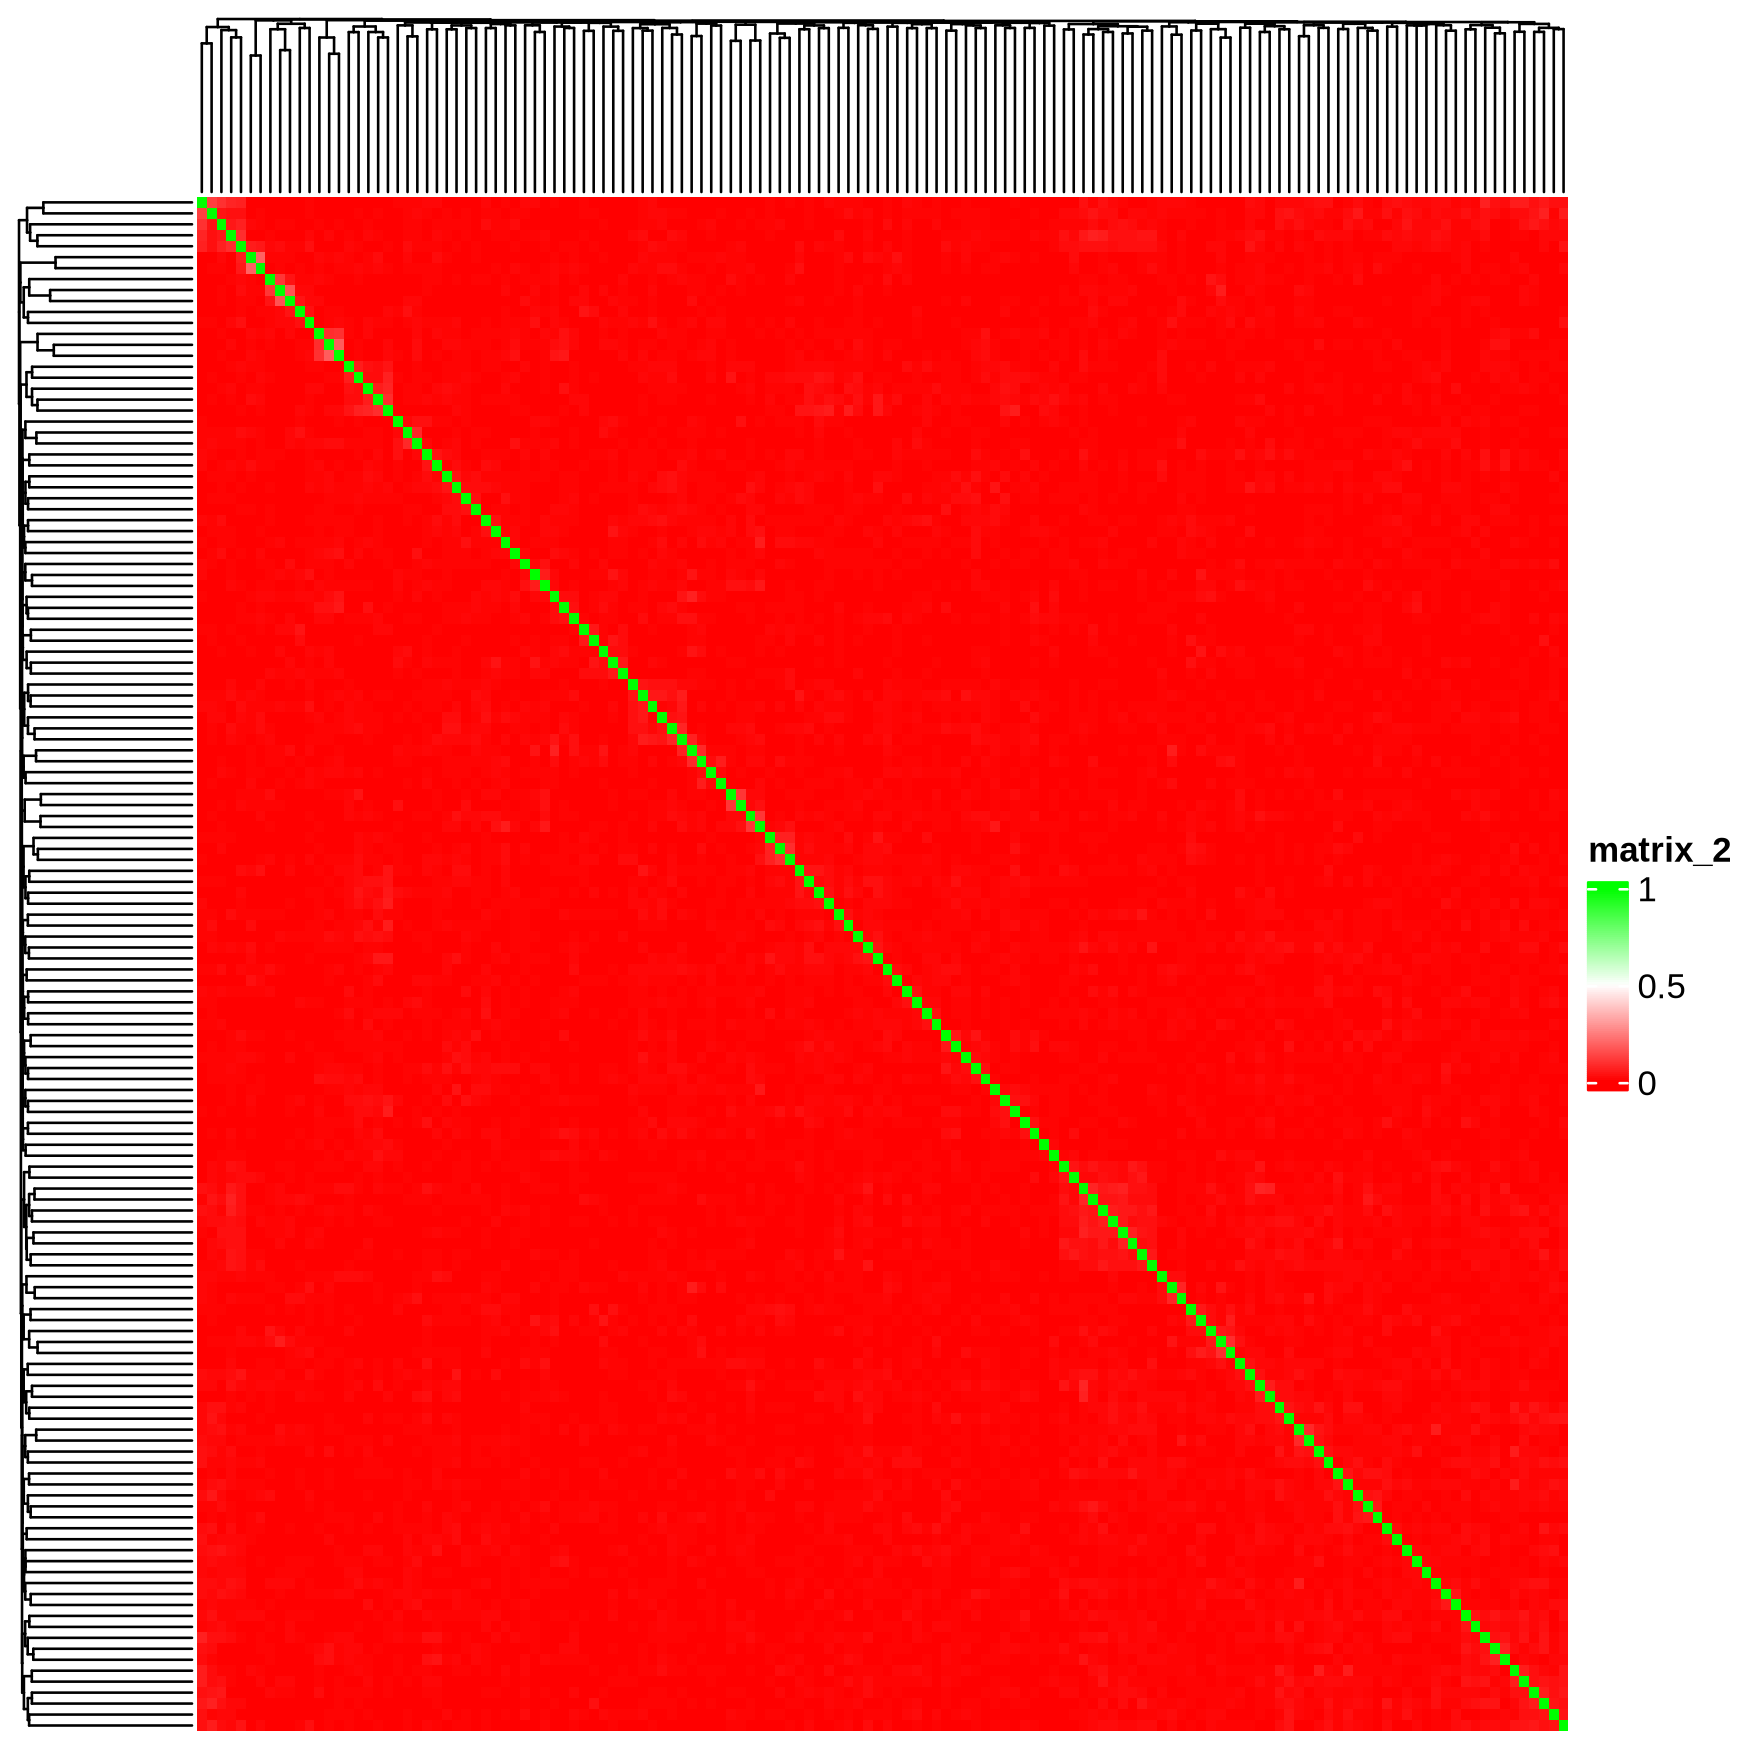

In [61]:
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 250)

pheatmap(
    cross_corr_matrix,
    clustering_distance_rows = "euclidean",
    clustering_distance_cols = "euclidean",
    clustering_method = "complete",
    color = colorRampPalette(c("red", "white", "green"))(50),
    display_numbers = FALSE,
    show_rownames = FALSE,
    show_colnames = FALSE,
    legend = TRUE,
    treeheight_row = 50,
    treeheight_col = 50,
    fontsize = 10,
    border_color = NA
)

In [62]:
# Save as piclke

In [64]:
head(ds_multiplier_z)

library(reticulate)

save_as_pickle <- function(object, filename, save_directory) {
  full_path <- file.path(save_directory, filename)
  py_save_object(r_to_py(object), full_path)
}

save_as_pickle(ds_multiplier_z, 'ds_multiplier_z.pkl', output_nb_path)

,LV52,LV147,LV83,LV15,LV831,LV104,LV56,LV267,LV502,LV327,⋯,LV90,LV483,LV186,LV86,LV100,LV654,LV71,LV145,LV618,LV815
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAS6,0.0000000,0.000000000,0.01632495,0.00000000,0.00000000,0.00000000,0.07204026,0.00000000,3.1198904,0.01461903,⋯,0.0000000,0.001009298,0,0.071565844,0.05165250,0.00000000,0.19804775,0.013208583,0.000000000,0.00000000
MMP14,0.0000000,0.009847897,0.00000000,0.07911726,0.00000000,0.00000000,0.03941513,0.00000000,0.0000000,0.00000000,⋯,0.0000000,0.000000000,0,0.000000000,0.03899408,0.00000000,0.00000000,0.001456251,0.067141437,0.02085292
DSP,0.0000000,0.000000000,0.00000000,0.00000000,0.00000000,0.01043736,0.00000000,0.00000000,0.0000000,0.00000000,⋯,0.0000000,0.000000000,0,0.015405778,0.09534890,0.00000000,0.00000000,0.000000000,0.002456838,0.00000000
MARCKSL1,0.0178098,0.035666176,0.00000000,0.63924171,0.11085744,0.00000000,0.68806301,0.00000000,0.0000000,0.00917497,⋯,0.0000000,0.000000000,0,0.000000000,0.06039142,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000
SPARC,0.0000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.01697109,0.0000000,0.05092090,⋯,0.0000000,0.131879197,0,0.003018132,0.00000000,0.01752007,0.01295741,0.000000000,0.088446184,0.00000000
CTSD,0.0000000,0.000000000,0.00000000,0.00000000,0.03852885,0.00000000,0.11700298,0.00000000,0.0678308,0.00000000,⋯,0.0456863,0.000000000,0,0.000000000,0.00000000,0.02492444,0.36776445,0.020525070,0.785038675,0.02541742


In [67]:
int_lvs = c("LV111", "LV962", "LV163", "LV864", "LV467", "LV100")

In [68]:
ds_phenomexcan_sig %>% 
dplyr::filter(lv %in% int_lvs)

,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
455008,6153_1,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Cholesterol lowering medication",LV111,2.288213e-09,1.366773e-05
632671,20001_1061,"Cancer code, self-reported: basal cell carcinoma",LV163,4.641537e-05,4.799405e-02
1177493,20002_1473,"Non-cancer illness code, self-reported: high cholesterol",LV111,1.291867e-08,6.299908e-05
1177507,20002_1473,"Non-cancer illness code, self-reported: high cholesterol",LV864,3.199055e-05,3.704387e-02
1716405,I25,Diagnoses - main ICD10: I25 Chronic ischaemic heart disease,LV163,2.862818e-05,3.414067e-02
2109219,20107_10,Illnesses of father: Alzheimer's disease/dementia,LV111,2.462601e-13,3.752276e-09
2196075,20110_5,Illnesses of mother: Breast cancer,LV467,1.035154e-08,5.166581e-05
2303671,I9_IHD,"Ischaemic heart disease, wide definition",LV163,1.315274e-05,1.941804e-02
2629371,20111_10,Illnesses of siblings: Alzheimer's disease/dementia,LV111,2.390638e-10,1.811062e-06


In [71]:
colnames(multiplier_summary)[2]= 'LVs'
multiplier_summary <- multiplier_summary %>% 
mutate(LVs=paste0('LV', LVs))

head(multiplier_summary)

,pathway,LVs,AUC,p-value,FDR
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,KEGG_LYSINE_DEGRADATION,LV1,0.3880591,8.660782e-01,0.9560054810
2,REACTOME_MRNA_SPLICING,LV1,0.7330575,4.772691e-05,0.0005816211
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,LV1,0.6805546,1.628217e-03,0.0113659048
4,KEGG_DNA_REPLICATION,LV1,0.5494735,3.121551e-01,0.5399506993
5,PID_MYC_ACTIVPATHWAY,LV1,0.6393027,2.170160e-02,0.0837394482
6,REACTOME_METABOLISM_OF_NUCLEOTIDES,LV1,0.5961217,1.064937e-01,0.2668264450


In [73]:
multiplier_summary %>%  
dplyr::filter(LVs %in% int_lvs) 

pathway,LVs,AUC,p-value,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
DMAP_HSC1,LV15,0.4716062,0.66125771,0.83655887
KEGG_BASAL_CELL_CARCINOMA,LV15,0.4393917,0.74169981,0.88732473
KEGG_CYSTEINE_AND_METHIONINE_METABOLISM,LV15,0.6768849,0.05049148,0.15945845
REACTOME_SIGNALING_BY_TGF_BETA_RECEPTOR_COMPLEX,LV15,0.4928002,0.53763272,0.75090202
PID_HIF2PATHWAY,LV15,0.6694692,0.05808061,0.17620235
IRIS_Monocyte-Day7,LV21,0.4777880,0.72705969,0.87973872
DMAP_MONO1,LV21,0.5611362,0.15196213,0.33967079
SVM Macrophages M2,LV21,0.5796630,0.19540901,0.39503021
REACTOME_LIPID_DIGESTION_MOBILIZATION_AND_TRANSPORT,LV21,0.5067966,0.47302499,0.68940195


In [78]:
ds_phenomexcan_sig %>% 
dplyr::filter(lv %in% ds_phenomexcan_sig$lv) 

,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
11844,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV52,3.866972e-09,2.194222e-05
11847,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV147,4.864166e-05,4.958498e-02
20727,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV83,4.067246e-09,2.280720e-05
20730,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV15,1.890873e-06,4.306259e-03
20731,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV831,2.350171e-06,5.110157e-03
20732,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV104,2.652783e-06,5.637607e-03
20734,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV56,3.186654e-06,6.534854e-03
20736,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV267,1.408842e-05,2.037481e-02
20737,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV502,2.797980e-05,3.365425e-02


In [82]:
multiplier_summary %>% 
dplyr::filter(FDR < 0.05 & AUC > 0.7) %>% 
dplyr::filter(LVs %in% ds_phenomexcan_sig$lv) 

pathway,LVs,AUC,p-value,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
SVM Dendritic cells activated,LV83,0.7086632,0.003368070,0.01947702
SVM Eosinophils,LV83,0.7098881,0.004663367,0.02525646
REACTOME_MUSCLE_CONTRACTION,LV111,0.7489945,0.001865771,0.01261589
PID_NFAT_3PATHWAY,LV358,0.7306555,0.001920470,0.01294517
REACTOME_CLEAVAGE_OF_GROWING_TRANSCRIPT_IN_THE_TERMINATION_REGION_,LV436,0.7656157,0.001766876,0.01202256
KEGG_PRIMARY_IMMUNODEFICIENCY,LV837,0.7578668,0.005357781,0.02815737
KEGG_COMPLEMENT_AND_COAGULATION_CASCADES,LV913,0.7493663,0.002547492,0.01583556
REACTOME_MUSCLE_CONTRACTION,LV962,0.7643591,0.002375220,0.01515784


In [83]:
sel_lv <- 'LV83'

ds_phenomexcan_sig %>% 
dplyr::filter(lv %in% sel_lv) 

multiplier_summary %>% 
dplyr::filter(LVs %in% sel_lv) 

,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
20727,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV83,4.067246e-09,0.0000228072
1134065,20002_1453,"Non-cancer illness code, self-reported: psoriasis",LV83,1.537440e-05,0.0217731249


pathway,LVs,AUC,p-value,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
SVM T cells CD4 memory activated,LV83,0.4689876,0.634428617,0.81650509
SVM Monocytes,LV83,0.6002687,0.106977421,0.26738157
SVM Dendritic cells activated,LV83,0.7086632,0.003368070,0.01947702
SVM Mast cells activated,LV83,0.5513762,0.297464793,0.52250127
SVM Eosinophils,LV83,0.7098881,0.004663367,0.02525646
REACTOME_CHEMOKINE_RECEPTORS_BIND_CHEMOKINES,LV83,0.3466440,0.943985145,0.98081694


In [85]:
sel_lv <- 'LV111'

ds_phenomexcan_sig %>% 
dplyr::filter(lv %in% sel_lv) 

multiplier_summary %>% 
dplyr::filter(LVs %in% sel_lv) 

,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
455008,6153_1,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Cholesterol lowering medication",LV111,2.288213e-09,1.366773e-05
1177493,20002_1473,"Non-cancer illness code, self-reported: high cholesterol",LV111,1.291867e-08,6.299908e-05
2109219,20107_10,Illnesses of father: Alzheimer's disease/dementia,LV111,2.462601e-13,3.752276e-09
2629371,20111_10,Illnesses of siblings: Alzheimer's disease/dementia,LV111,2.390638e-10,1.811062e-06
3931222,20110_10,Illnesses of mother: Alzheimer's disease/dementia,LV111,7.400808e-13,9.733912e-09
4025976,IGAP_Alzheimer,Alzheimers Disease,LV111,2.391988e-12,2.753061e-08


pathway,LVs,AUC,p-value,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION,LV111,0.4493400,0.814135754,0.93382428
REACTOME_MUSCLE_CONTRACTION,LV111,0.7489945,0.001865771,0.01261589
PID_ILK_PATHWAY,LV111,0.4899743,0.552828373,0.75764881


In [86]:
sel_lv <- 'LV358'

ds_phenomexcan_sig %>% 
dplyr::filter(lv %in% sel_lv) 

multiplier_summary %>% 
dplyr::filter(LVs %in% sel_lv) 

,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
1177501,20002_1473,"Non-cancer illness code, self-reported: high cholesterol",LV358,1.015131e-05,0.01598016
1303833,6177_1,"Medication for cholesterol, blood pressure or diabetes: Cholesterol lowering medication",LV358,1.405983e-05,0.02035533


pathway,LVs,AUC,p-value,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
PID_NFAT_3PATHWAY,LV358,0.7306555,0.00192047,0.01294517
KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS,LV358,0.5825321,0.17804181,0.37413202


In [87]:
sel_lv <- 'LV837'

ds_phenomexcan_sig %>% 
dplyr::filter(lv %in% sel_lv) 

multiplier_summary %>% 
dplyr::filter(LVs %in% sel_lv) 

,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
1047213,20002_1452,"Non-cancer illness code, self-reported: eczema/dermatitis",LV837,4.226045e-05,0.04494074
2847499,IV_ENDOCRIN_NUTRIT,"Endocrine, nutritional and metabolic diseases",LV837,1.835583e-05,0.02471406


pathway,LVs,AUC,p-value,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
DMAP_PRE_BCELL2,LV837,0.3204157,0.895302721,0.96510143
DMAP_PRE_BCELL3,LV837,0.4755754,0.567828384,0.76502550
DMAP_TCELLA3,LV837,0.4851329,0.575276434,0.77105967
SVM Dendritic cells resting,LV837,0.5401174,0.323841261,0.55137112
KEGG_PRIMARY_IMMUNODEFICIENCY,LV837,0.7578668,0.005357781,0.02815737
PID_CD8TCRPATHWAY,LV837,0.5895252,0.126425898,0.30000073
REACTOME_APOPTOTIC_EXECUTION_PHASE,LV837,0.5850045,0.165726493,0.35884860
KEGG_HEMATOPOIETIC_CELL_LINEAGE,LV837,0.5466761,0.239938126,0.45558674
